In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.preprocessing as skp

In [140]:
### review

# sns.displot(data, x, hue)
# sns.countplot(data, x, hue) #categorical attributes
# sns.kdeplot(data, x, hue)
# sns.stripplot(data, x, y, hue)
# sns.swarmplot(data, x, y, hue)
# sns.barplot(data, x, y, hue)
# sns.pointplot(data, x, y, hue)
# sns.regplot(data, x, y) #no hue
# sns.lmplot(data, x, y, hue)

In [141]:
df = sns.load_dataset('titanic')


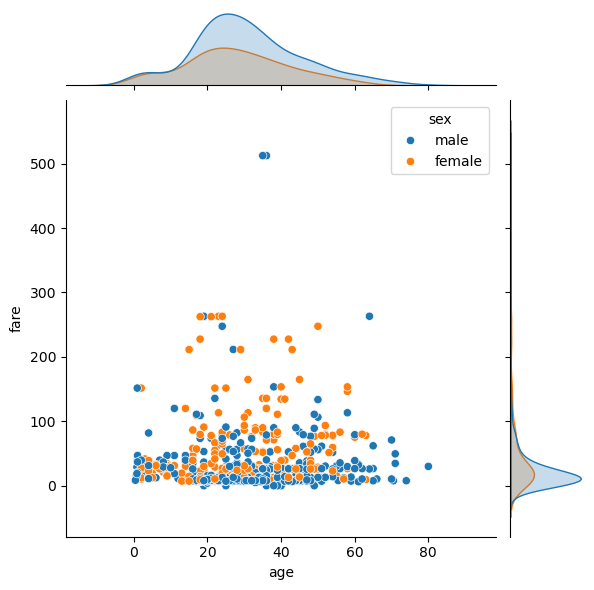

In [142]:
# jointplot

# sns.jointplot(data = df, x = 'age', y = 'fare', kind = 'reg')
sns.jointplot(data = df, x = 'age', y = 'fare', hue = 'sex')

<Axes: xlabel='class', ylabel='sex'>

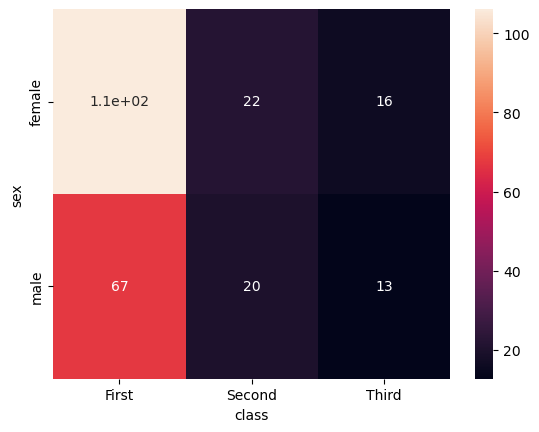

In [143]:
# heatmap

pt = df.pivot_table(index = 'sex', columns = 'class', values = 'fare', observed = True)

sns.heatmap(data = pt, annot = True)

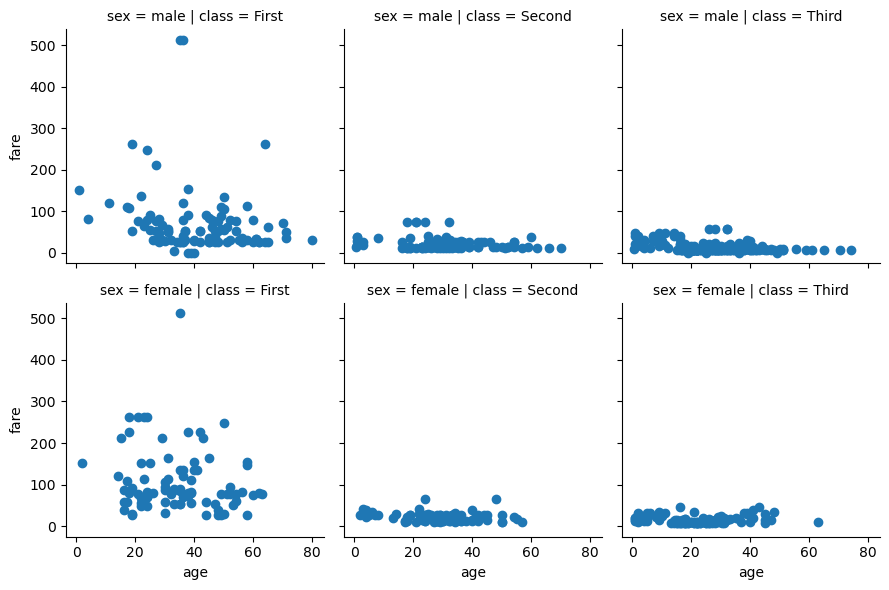

In [144]:
# FacetGrid
# compare different distributions of people based on attributes
# compare males and females of each class on a specific datapoint
# to plot you use map

sns.FacetGrid(data = df, row = 'sex', col = 'class').map(plt.scatter, 'age', 'fare')

# things you can use in the map
# sns.regplot
# plt.scatter
# plt.plot


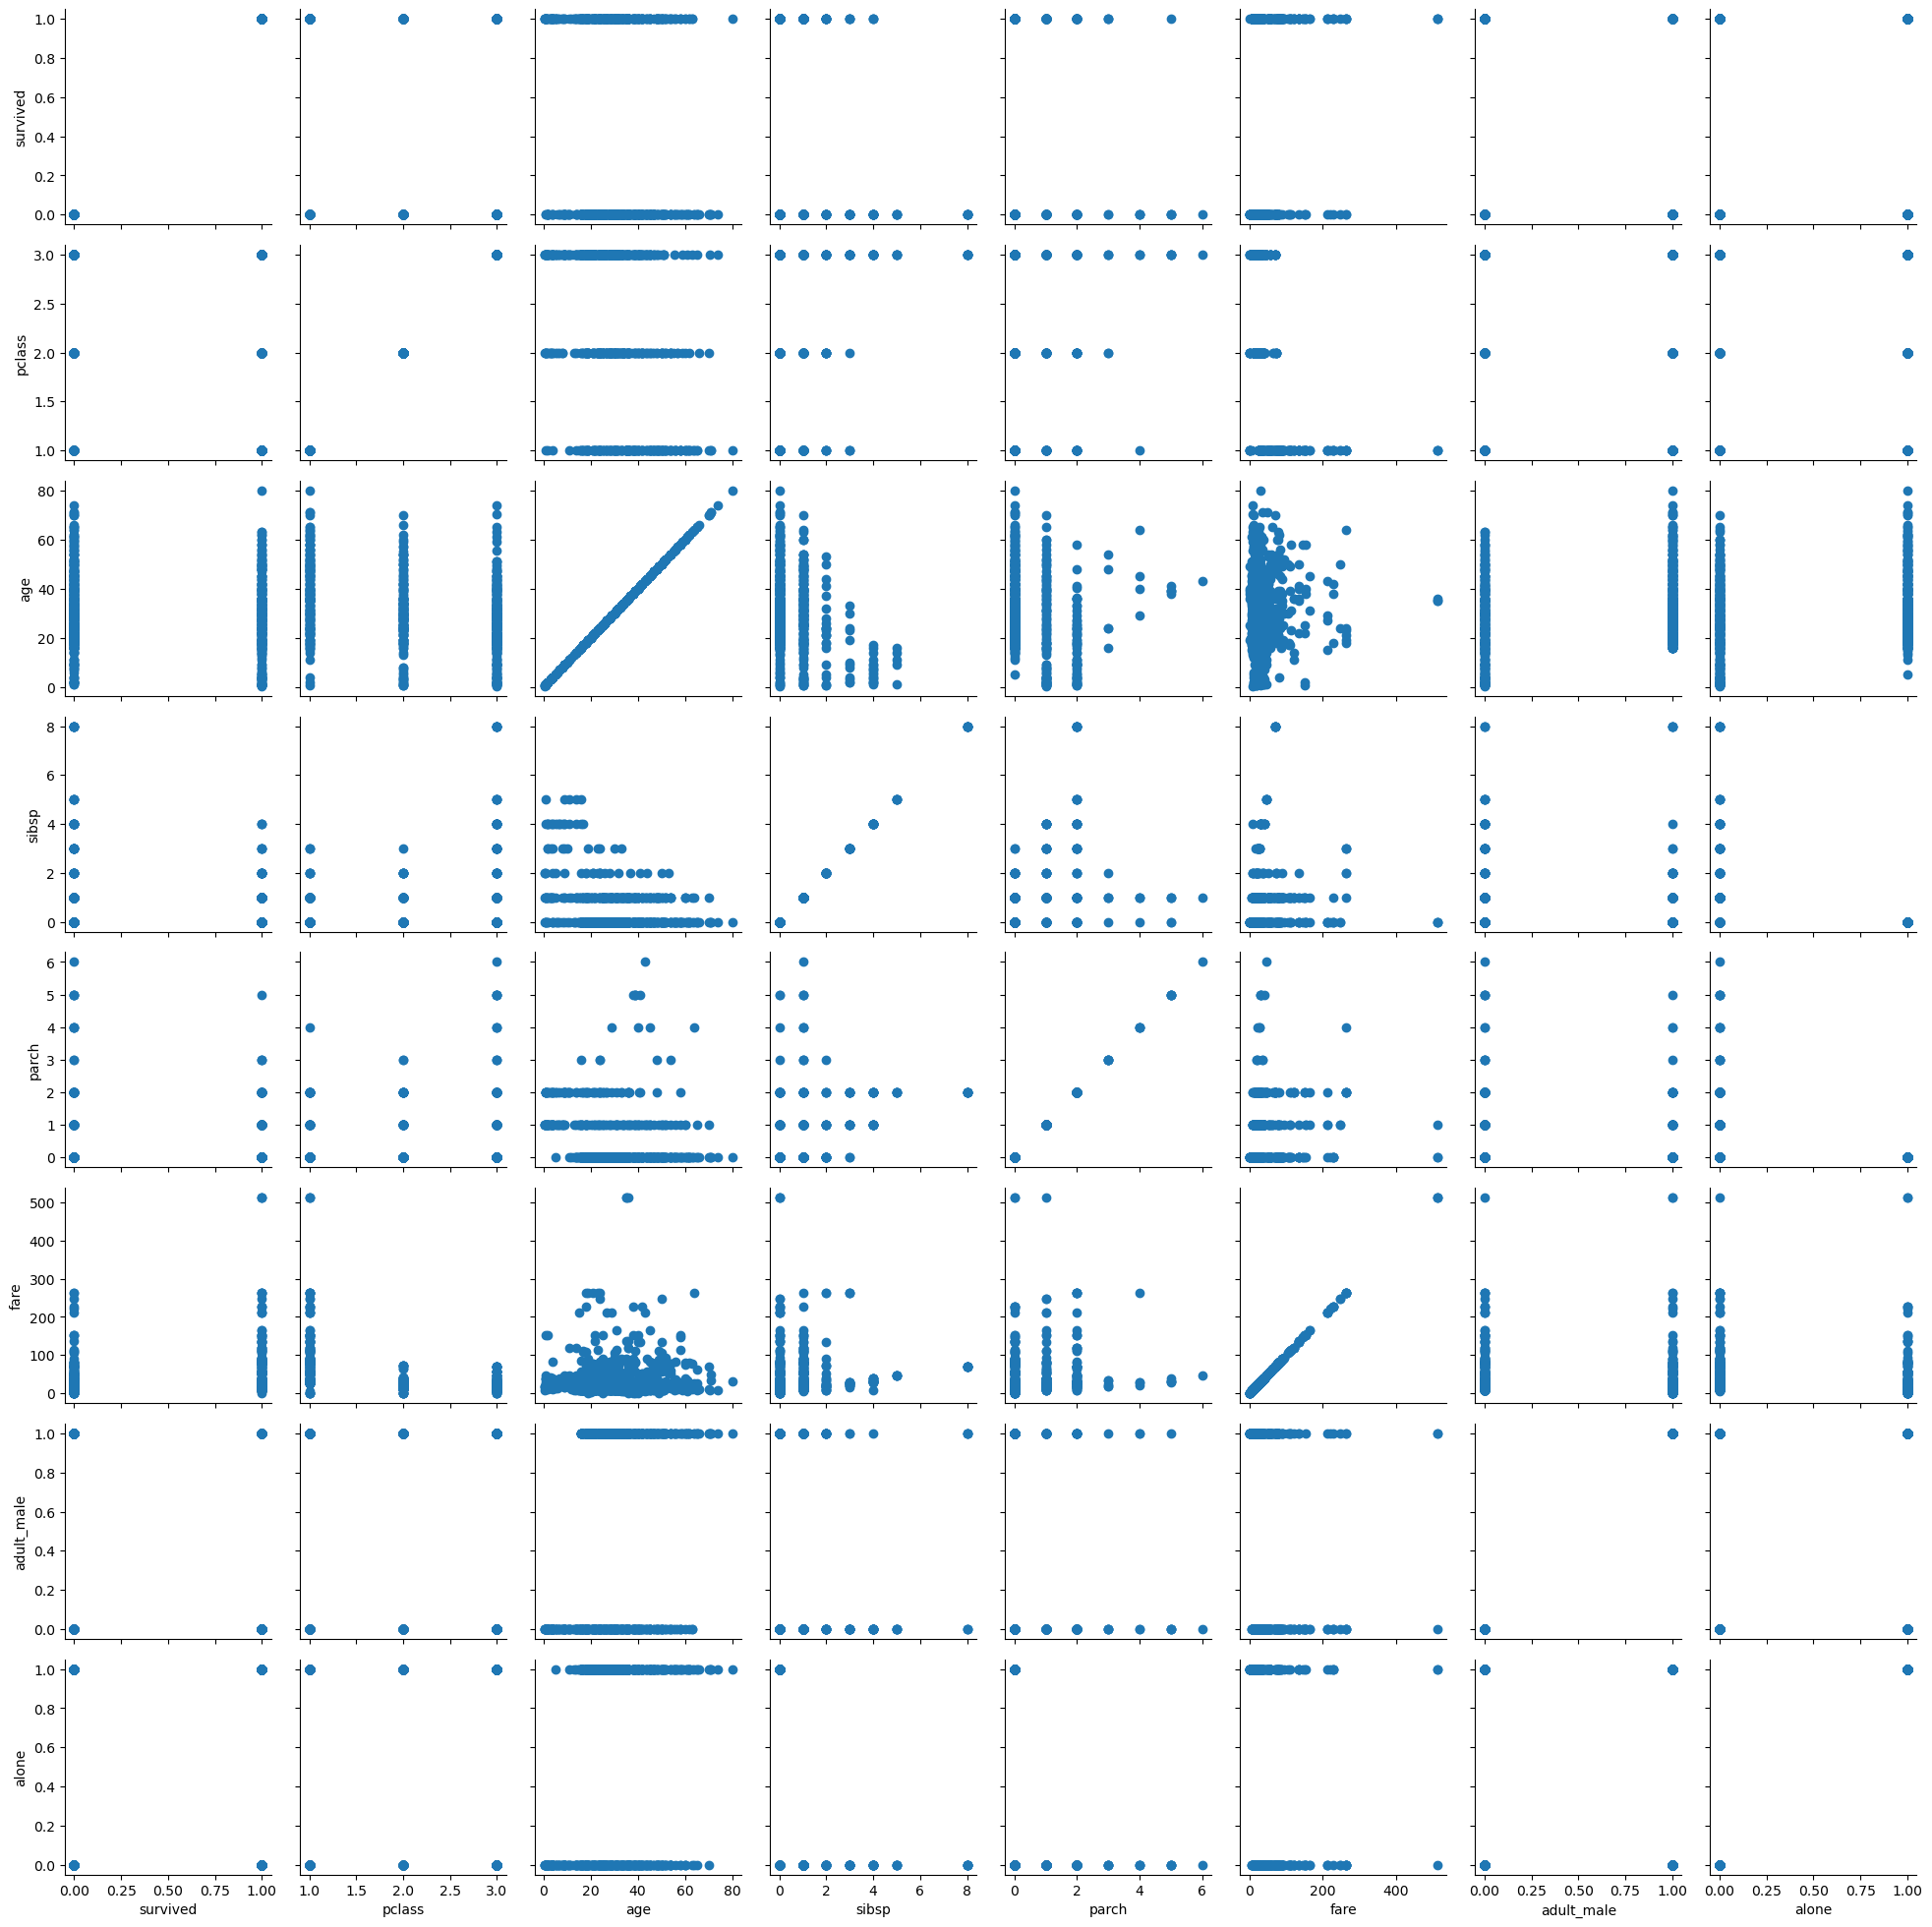

In [145]:
# PairGrid
# gives you all different pairs of data to relations between all different variables
# can use any type of chart you want 

sns.PairGrid(data = df).map(plt.scatter)


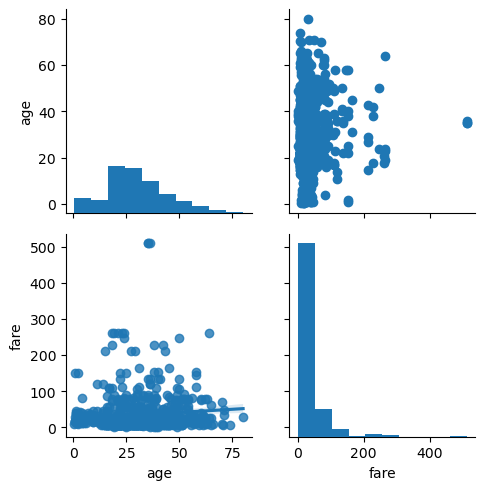

In [146]:
# can specify the grid

sns.PairGrid(data = df[['age', 'fare']]).map_diag(plt.hist).map_upper(plt.scatter).map_lower(sns.regplot)
# what we did
# top-left to bottom-right diagonal are histograms
# top row are scatter plots
# bottom row are regplots

In [147]:
# subPlots

"""
fig, ax = plt.subplots(2,2)
ax[0, 0].plot(x1, y2)
ax[0, 1].plot(x2, y2)
ax[1, 0].plot(x3, y3)
ax[1, 1].plot(x4, y4)
"""

'\nfig, ax = plt.subplots(2,2)\nax[0, 0].plot(x1, y2)\nax[0, 1].plot(x2, y2)\nax[1, 0].plot(x3, y3)\nax[1, 1].plot(x4, y4)\n'

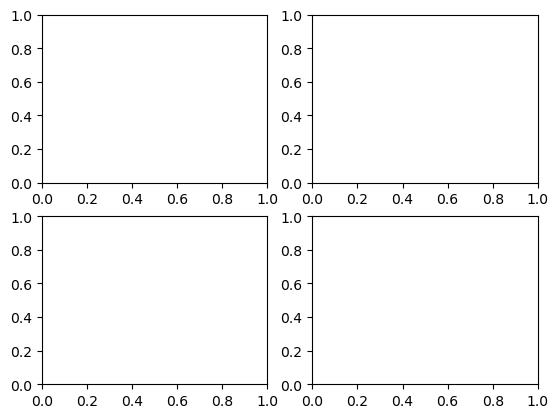

In [148]:
fig, ax = plt.subplots(2, 2)
plt.show()

# the numbers inside the subplots() are
# subplots(rows, columns)
# figure is the overall container of the pplots (the whole white space)
# ax are all the different plots
# in the above case of 2,2
# ax[0, 1] is the top right plot

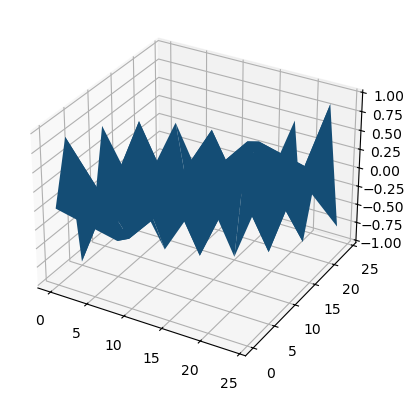

In [149]:
# 3d plots

x = np.arange(25).reshape(5,5)
y = np.arange(25).reshape(5,5)
z = np.sin(x + y)

ax = plt.axes(projection = '3d')

# ax.plot3D(x, y, z)
# ax.scatter3D(x, y, z)
ax.plot_surface(x, y, z)
plt.show()


In [150]:
### Summary

In [151]:
# One Variable
    # Categorical
        # sns.countplot
    # Continuous
        # plt.hist
        # plt.pie
        # plt.boxplot
        # sns.displot
        # sns.kdeplot

# Two Variables
    # Categorical vs Categorical
        # sns.barplot
        # sns.pointplot
        # sns.heatmap
    
    # Continuous vs Continuous
        # plt.bar
        # plt.scatter
        # plt.plot
        # sns.regplot
        # sns.lmplot
        # sns.jointplot
        # sns.PairGrid
    
    # Continuous vs Categorical
        # sns.swarmplot
        # sns.stripplot
        # sns.FacetGrid
        # can use hue for all of these

In [152]:
### Data Pre-processing

In [153]:
df = pd.read_csv('tips.csv')

df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [154]:
# Normalization 
# In this case, taking numbers and making them between 0 and 1

skp.MinMaxScaler().fit_transform(df[['total_bill']])
# expects more than 1 value, so either use [[]] or reshape it using values.reshape(-1, 1)

array([[0.29157939],
       [0.1522832 ],
       [0.3757855 ],
       [0.43171345],
       [0.45077503],
       [0.46543779],
       [0.11939673],
       [0.49874319],
       [0.25073314],
       [0.24528697],
       [0.15081693],
       [0.67427734],
       [0.25869292],
       [0.32174277],
       [0.24633431],
       [0.38772518],
       [0.15207373],
       [0.27691663],
       [0.29116045],
       [0.36824466],
       [0.31105991],
       [0.36070381],
       [0.2660243 ],
       [0.761416  ],
       [0.35085882],
       [0.30875576],
       [0.21575199],
       [0.20150817],
       [0.39023879],
       [0.34729786],
       [0.13573523],
       [0.32006703],
       [0.25115207],
       [0.36908253],
       [0.30812736],
       [0.43967323],
       [0.27733557],
       [0.29032258],
       [0.32718894],
       [0.59069962],
       [0.27167993],
       [0.30142438],
       [0.22769166],
       [0.13845832],
       [0.57247591],
       [0.31881022],
       [0.40134059],
       [0.614

In [155]:
# Standardization
# Taking the input and turning it into a standard distribution
# mean = 0, std = 1

skp.StandardScaler().fit_transform(df[['total_bill']])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [156]:
# Label Encoding
# takes categorical data and turns it into numerical data

# LabelEncoder() takes one value at a time
df['encoded_day'] = skp.LabelEncoder().fit_transform(df['day'])


In [157]:
# Data binarization

# created a list for the labels
labels = skp.LabelBinarizer().fit_transform(df['day'])

# created a dataframe that has the right column names and a 1 on the correct day
lbl_df = pd.DataFrame(labels, columns = sorted(df.day.unique()))

In [158]:
# now you can check which day it is by having a 1 in the column name
pd.concat([df, lbl_df], axis = 1)

,total_bill,tip,sex,smoker,day,time,size,encoded_day,Fri,Sat,Sun,Thur
0,16.99,1.01,Female,No,Sun,Dinner,2,2,0,0,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,2,0,0,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,2,0,0,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,2,0,0,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,1,0,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,1,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0,1,0,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,1,0,0


In [159]:
# data binning
# converting continuous data into numerical data

# will divide the tip values into 3 groups, and assign 0,1,2 depending on which range of tips it is in
df['disc_tip'] = skp.KBinsDiscretizer(n_bins = 3, encode = 'ordinal').fit_transform(df[['tip']])

In [160]:
df['disc_tip'].replace(0, 'small', inplace = True)
df['disc_tip'].replace(1, 'average', inplace = True)
df['disc_tip'].replace(2, 'big', inplace = True)

/var/folders/kx/58cjbwzx5jjgn5w_sjz3qk0w0000gn/T/ipykernel_1845/3071472472.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['disc_tip'].replace(0, 'small', inplace = True)


In [161]:
df

,total_bill,tip,sex,smoker,day,time,size,encoded_day,disc_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,2,small
1,10.34,1.66,Male,No,Sun,Dinner,3,2,small
2,21.01,3.50,Male,No,Sun,Dinner,3,2,big
3,23.68,3.31,Male,No,Sun,Dinner,2,2,big
4,24.59,3.61,Female,No,Sun,Dinner,4,2,big
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,big
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,small
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,small
242,17.82,1.75,Male,No,Sat,Dinner,2,1,small
